In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

# This changes the working folder to the TPX3 folder.
os.chdir('/content/drive/MyDrive/TPX3')
import pandas as pd

data = pd.read_csv('ASTAR_TSP.txt')
print(data)
rho_gcm = 2.329
d_e_cm = 0.01
data_n = data.astype(float)
print(data_n)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Kinetic_Energy_MeV   Total_Stp._Pow._MeV_cm2/g
0                0.0010                      121.30
1                0.0015                      134.20
2                0.0020                      144.70
3                0.0025                      153.90
4                0.0030                      162.40
..                  ...                         ...
116            800.0000                       14.45
117            850.0000                       13.91
118            900.0000                       13.43
119            950.0000                       13.00
120           1000.0000                       12.61

[121 rows x 2 columns]
     Kinetic_Energy_MeV   Total_Stp._Pow._MeV_cm2/g
0                0.0010                      121.30
1                0.0015                      134.20
2                0.0020                      144.70
3              

In [ ]:
#slit Exp1 for I_0
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
#first need to import the files from Google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'14d1OGcqo1KqN4MoBpEME-4gmt9H66Ky1'}) 
downloaded.GetContentFile('ASTAR_TSP.txt')
#2
import pandas as pd
data = pd.read_csv('ASTAR_TSP.txt')
print(data)


     Kinetic_Energy_MeV   Total_Stp._Pow._MeV_cm2/g
0                0.0010                      121.30
1                0.0015                      134.20
2                0.0020                      144.70
3                0.0025                      153.90
4                0.0030                      162.40
..                  ...                         ...
116            800.0000                       14.45
117            850.0000                       13.91
118            900.0000                       13.43
119            950.0000                       13.00
120           1000.0000                       12.61

[121 rows x 2 columns]


In [ ]:
data['E dep MeV'] = data['Total_Stp._Pow._MeV_cm2/g']
print(data)

KeyError: ignored

In [ ]:
from scipy.optimize import fsolve
import math

def equations(p):
    a, b, c, t = p
    return (a*0.0263+b-c/(0.0263-t) - 5, a*0.0596+b-c/(0.0596-t) - 39, a*0.2+b-c/(0.2-t) - 26, a*0.9634+b-c/(0.9634-t) - 64 )

a, b, c, t =  fsolve(equations, (1, 1, 1, 1, 1))

print(equations(a, b, c, t))
# a*0.2098+b-c/(0.2098-t) - 27,

ValueError: ignored

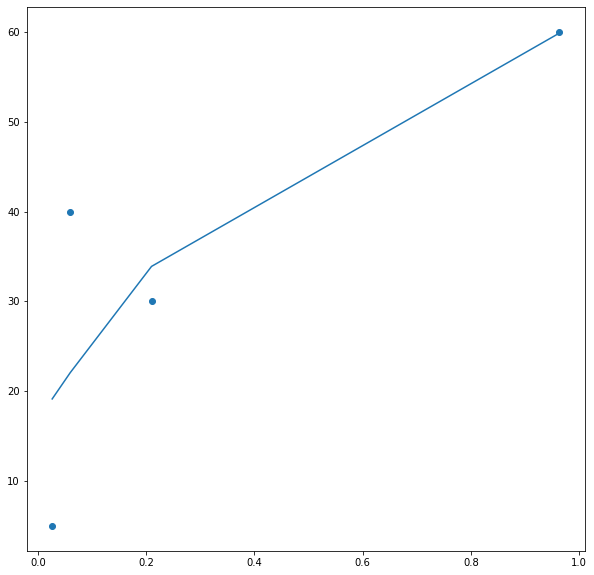

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ToT = np.array([5,40,30,60])
E = np.array([0.0263,0.0596,0.2098,0.9634])
a, b, c = np.polyfit(E, ToT, 2)
plt.figure(figsize = (10,10))
plt.scatter(E, ToT)
plt.plot(E, a*E**2+b*E+c)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

delta = 0.025
xrange = np.arange(-2, 2, delta)
yrange = np.arange(-2, 2, delta)
X, Y = np.meshgrid(xrange,yrange)

# F is one side of the equation, G is the other
F = X**2
G = 1- (5*Y/4 - np.sqrt(np.abs(X)))**2
plt.contour((F - G), [0])
plt.show()

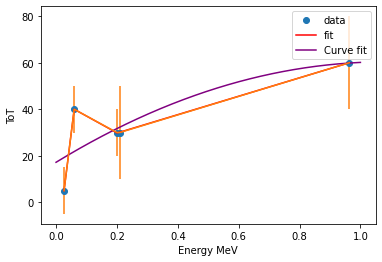

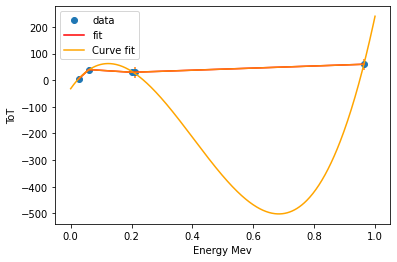

[ 6421.43498112 -7776.12114388  1626.82870035   -31.81194297]
[ 6406.52031333 -7758.20817965  1623.30064683   -31.70438779]
[-36.92483051  79.87238422  17.19771632]
[-36.98721638  79.93734995  17.19143981]
41.43459471943354 19.77653734408582 -0.2790124895114895 0.04388487834896907


In [3]:
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
#defining the function provided
    def E_func(x, a, b, c, t):
        return a*x + b - (c)/(x-t)
     
    polyline = np.linspace(0, 1, 500)
    xdata = np.array([0.0263,0.0596,0.2,0.2098,0.9634])
    ydata = np.array([5,40,30,30,60])
    yerror = [10,10,10,20,20]
    #determining the quadratic curve of best fit 
    model = np.poly1d(np.polyfit(xdata, ydata, 2))
    plt.plot(xdata, ydata, 'o', label='data')
    #determining the best fit for the curve
    popt, pcov = curve_fit(E_func, xdata, ydata, p0=[1,0,0,0], maxfev = 5000)
    plt.plot(xdata, E_func(xdata, *popt), 'r-', label='fit')
    plt.errorbar(xdata,ydata,yerr = yerror)
    plt.plot(polyline, model(polyline), color='purple', label='Curve fit')
    plt.xlabel('Energy MeV')
    plt.ylabel('ToT')
    plt.legend()
    plt.show()

    #same code as above but now comparing a cubic curve of best fit to the best fit 
    polyline = np.linspace(0, 1, 500)
    xdata = np.array([0.0263,0.0596,0.2,0.2098,0.9634])
    ydata = np.array([5,40,30,30,60])
    model2 = np.poly1d(np.polyfit(xdata, ydata, 3))
    plt.plot(xdata, ydata, 'o', label='data')
    plt.errorbar(xdata,ydata,yerr = yerror)
    popt, pcov = curve_fit(E_func, xdata, ydata, p0=[1,0,0,0], maxfev = 5000)
    plt.plot(xdata, E_func(xdata, *popt), 'r-', label='fit')
    plt.plot(polyline, model2(polyline), color='orange', label='Curve fit')
    plt.xlabel('Energy Mev')
    plt.ylabel('ToT')
    plt.legend()
    plt.show()

    #code below calculates to coefficients of the curves of best fit
    #can be seen that the coeffiecients calculated in z_1 and z_2 have a ratio much closer to unity compared to ratio between z and z_3
    #therefore the quadratic curve is the best fit 
    z = np.polyfit(polyline, model2(polyline),3)
    z_3 = np.polyfit(xdata, E_func(xdata, *popt),3)
    z_1 = np.polyfit(polyline, model(polyline),2)
    z_2 = np.polyfit(xdata, E_func(xdata, *popt),2)
    print(z)
    print(z_3)
    print(z_1)
    print(z_2)
    print(*popt)